In [339]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#import packages

In [445]:
data = pd.read_csv('/Users/samchoy/Downloads/Analyst Pre-interview Excercise/daily_gross_returns.csv', 
                   header=0, index_col=0, parse_dates= True, dayfirst=True, na_values =-99.99)
data.applymap(type).eq(float).head()
#import csv data and check data type 

,daily_gross_return_pct
nav_datetime,
2022-09-27,False
2022-09-28,False
2022-09-29,False
2022-09-30,False
2022-10-01,False


In [446]:
data["daily_gross_return_pct"]=pd.to_numeric(data["daily_gross_return_pct"].str.rstrip('%'))/100
data.head()
#convert returns data from object to float

,daily_gross_return_pct
nav_datetime,
2022-09-27,0.0000
2022-09-28,0.0000
2022-09-29,0.0000
2022-09-30,0.0000
2022-10-01,0.0031


# Define a function to calculate daily net returns based on daily gross returns and performance fee.

First, calculate the cumulative gross returns using the daily return figures. Then, calculate the NAV before fees and the previous peaks. 

Assuming no benchmark hurdle rate and NAV starts at 100, if the NAV before fees is lower than the previous peak, the daily net return will be equal to the daily gross return *(assuming high watermark is recalculated on a daily basis and hence any subsequent underperformance would not reduce the performance fees)* .

If a new peak is reached, then the daily net return will be equal to daily gross return net of the performance fee.

In [447]:
def calculate_net_returns(gross_returns, performance_fee):
    daily_net_returns = []
    cumulative_gross_return = (1 + gross_returns).cumprod() - 1
    NAV_before_fees = (cumulative_gross_return+1)*100
    Previous_peaks = NAV_before_fees.cummax()

    for i in range (len(gross_returns)):
        
        if NAV_before_fees.iloc[i,0] < Previous_peaks.iloc[i,0]:
            daily_net_return = gross_returns.iloc[i,0]
            
        else:
            daily_net_return = gross_returns.iloc[i,0] * (1 - performance_fee)
        
        daily_net_returns.append(daily_net_return)
    
    
    
    return daily_net_returns, cumulative_gross_return, NAV_before_fees, Previous_peaks

In [448]:
daily_net_returns, cumulative_gross_return, NAV_before_fees, Previous_peaks = calculate_net_returns(data, 0.3)

In [453]:
data["daily_net_return_pct"] = daily_net_returns
data["2022-10":]

,daily_gross_return_pct,daily_net_return_pct
nav_datetime,,
2022-10-01,0.0031,0.00217
2022-10-02,0.0092,0.00644
2022-10-03,0.0146,0.01022
2022-10-04,0.0020,0.00140
2022-10-05,0.0045,0.00315
...,...,...
2023-12-27,0.0302,0.02114
2023-12-28,0.0105,0.00735
2023-12-29,-0.0109,-0.01090


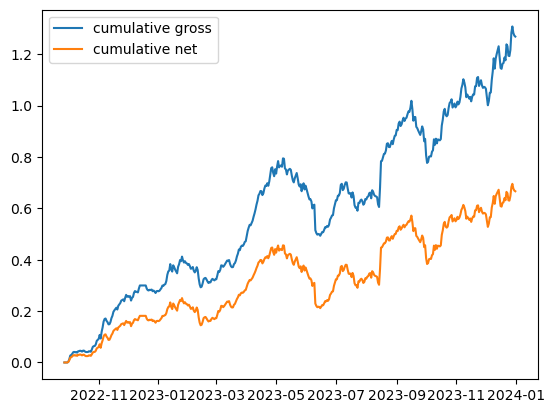

In [454]:
cumulative_gross_return = (1+data["daily_gross_return_pct"]).cumprod()-1
cumulative_net_return = (1+data["daily_net_return_pct"]).cumprod()-1

plt.plot(cumulative_gross_return)
plt.plot(cumulative_net_return)
plt.legend(['cumulative gross','cumulative net'])
#plot cumulative gross and net returns

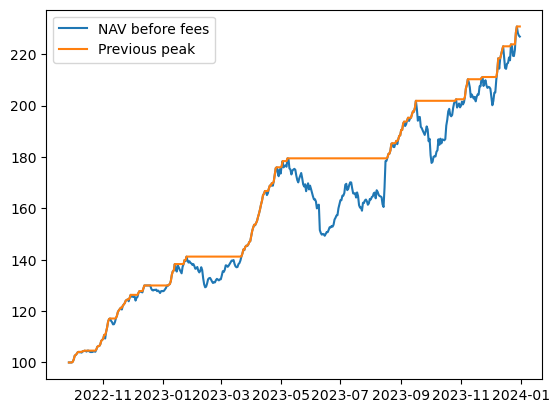

In [455]:
plt.plot(NAV_before_fees)
plt.plot(Previous_peaks)
plt.legend(['NAV before fees', 'Previous peak'])
#plot NAV before fees and previous peaks

In [464]:
cumulative_net_return.to_csv('cumulative_net_returns.csv', header=True)
#export to csv